In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# He uses 3 layers, with the hidden layers that uses 5 nodes

We will denote by $\Omega$, the set of weights of the neural Network, that is

$$\Omega = \left\{ v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4 \right\} $$

And $$N(x,\Omega) = \sum_{j=1}^5 v_j\phi(w_jx+u_j) $$

Where we use $5$ hidden nodes and one hidden layer

In [2]:

def sigm_fun(x):
    return 1/(1+np.exp(-x))

def phi_prime(z): #1st derivative
    result = np.exp(-z)/((1+np.exp(-z))**2)
    return result

def phi_second(z): #2nd derivative
    first_addend = -np.exp(-z)/((1+np.exp(-z))**2)
    second_addend = 2*np.exp(-2*z)/((1+np.exp(-z))**3)
    return first_addend + second_addend

# Usa *args, come input e spacchetta

def compute_neural_network(x,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    ''' NN '''
    result = v0*sigm_fun(w0*x+u0)
    result += v1*sigm_fun(w1*x+u1)
    result += v2*sigm_fun(w2*x+u2)
    result += v3*sigm_fun(w3*x+u3)
    result += v4*sigm_fun(w4*x+u4)
    return result

In [3]:
np.random.seed(10)
sampl = np.random.uniform(low=-10, high=10, size=(15,))
v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4 = sampl
print(sampl)

[ 5.42641287 -9.58496101  2.6729647   4.97607765 -0.02985975 -5.50406709
 -6.0387427   5.21061424 -6.61778327 -8.23320372  3.70719637  9.06786692
 -9.92103467  0.24384527  6.25241923]


In [4]:
compute_neural_network(2,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)

1.2171753884110106

Some tricks for writing better code... Later

Usa *args, come input e spacchetta

def comp_neur_net(x,*weights):
    for i in weights:
        print(i)

comp_neur_net(2,*(v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

----

my_vars = {}
for i in range(10):
    var_name = "var%d" % i
    my_vars[var_name] = i

print(my_vars["var2"])

This is equivalent to creating var0 = 0, var1 = 1, and so on.

# First example in the paper of Mall, Charkaverty

In [5]:
def y_n(x,*weights):
    return x*compute_neural_network(x,*weights)
y_n(2,*(v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

2.434350776822021

## 1 Computing E (we need alpha-derivative)

we take $10$ equidistant points

$$E[weights] = \sum_{i=1}^{10} [D^\alpha y_N(x_i,weights) - f(x_i, y_N(x_i,weights))]^2 =$$ 

$$=\sum_{i=1}^{10} addend-in-E-w $$
how it is named in the code below

where 

$$ D^\alpha y(x) = x$$

so $f(x,weights) = x$

then 

$$ y_N(x,weights) = xN(x,weights)$$

Moreover, 

$$ D_x^\alpha (N) := D_x^\alpha N(x,weights) = \sum_{j=1}^5 v_j \phi'(w_jx+u_j)w_jx^{1-\alpha} $$

So that we get, if $x_0=0$ (centered in $0$ the initial condition)

$$D_x^\alpha y_N(x,weights) = D_x^\alpha (xN) = x^{1-\alpha}N + xD_x^\alpha (N) $$

In [6]:
# 10 equidistant points between 0 and 1 included
# np.linspace(0,1,10)

In [7]:
def der_alpha_y_N(x,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4): # Depends on the fDe

    first_addend = x**(1-alp)*compute_neural_network(x,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)

    def der_alpha_N(alp,x,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):

        tot_sum = v0*phi_prime(w0*x+u0)*w0*x**(1-alp)
        tot_sum += v1*phi_prime(w1*x+u1)*w1*x**(1-alp)
        tot_sum += v2*phi_prime(w2*x+u2)*w2*x**(1-alp)
        tot_sum += v3*phi_prime(w3*x+u3)*w3*x**(1-alp)
        tot_sum += v4*phi_prime(w4*x+u4)*w4*x**(1-alp)

        return tot_sum

    second_addend = x*der_alpha_N(alp,x,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)

    return first_addend + second_addend

In [8]:
points_to_evaluate = np.linspace(0,1,50)

def E(alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate): #E[weights]
    ''' 
    returns the value of E, knowing 
    alpha, weights of the NN, and the points_to_evaluate.
    '''
    
    def addend_in_E_w(x,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
        
        def f_x_i_y_N(x): # In this special case is x
            return x
        
        return (der_alpha_y_N(x,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4) - f_x_i_y_N(x))**2
    
    tot_sum = 0
    for x in points_to_evaluate:
        tot_sum += addend_in_E_w(x,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
    
    return tot_sum

# Check again that the function is correct

In [9]:
# alpha = 0.5
E(0.5,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)

3124.747807239304

## 2 Compute partial derivatives of E wrt to the weights 

We know that 
$$ D_x^\alpha (N) := D_x^\alpha N(x,weights) = \sum_{j=1}^5 v_j \phi'(w_jx+u_j)w_jx^{1-\alpha} $$.

Thus

## Let's start by computing derivative of E wrt to w_k

$$\frac{\partial E[weights]}{\partial w_k} = \sum_{j=1}^{10} 2[D^\alpha y_N(x_i,weights) - f(x_i, y_N(x_i,weights))] [\frac{\partial D^\alpha y_N}{\partial w_k}-\frac{\partial f}{\partial w_k}]$$

In the first example in the paper of Mall, $f(x,y_N(x,weights)) = x$. Thus $\frac{\partial f}{\partial w_k}=0$ .

Moreover, we use equation 16 from the paper of Mall. We remember that in this particular case we have

$$ y_N(x,weights) = xN(x,weights)$$

that is 

$$D_x^\alpha y_N(x,weights) = D_x^\alpha (xN) = x^{1-\alpha}N + xD_x^\alpha (N) $$

so that from eq.16, we get

\begin{equation}
\frac{\partial D^\alpha y_N}{\partial w_k} =x^{1-\alpha}\frac{\partial N}{\partial w_k} + x\frac{\partial D_x^\alpha (N)}{\partial w_k} = x^{1-\alpha}\frac{\partial N}{\partial w_k} + x(v_kx^{1-\alpha}(\phi'(w_kx+u_k) + \phi''(w_kx+u_k) w_kx))
\end{equation}

It is left to compute $\frac{\partial N}{\partial w_k}$. We remind that $N=\sum_{j=1}^5 v_j\phi(w_jx+u_j)$. So that we get $\frac{\partial N}{\partial w_k}= v_k\phi'(w_kx+u_k)x$. So that we get 

$$\frac{\partial D^\alpha y_N}{\partial w_k} = x^{2-\alpha}v_k\phi'(w_kx+u_k) + (v_kx^{2-\alpha}(\phi'(w_kx+u_k) + \phi''(w_kx+u_k) w_kx)) $$

And finally

$$\frac{\partial E}{\partial w_k} = \sum_{j=1}^{10} 2[D^\alpha y_N(x_i,weights) - f(x_i, y_N(x_i,weights))] [\frac{\partial D^\alpha y_N}{\partial w_k}] $$

In [10]:
def der_E_wrt_wj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate):
    ''' As input, exactly the parameters of the function E'''
    
    def addend_in_E_wrt_wj(x,j,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
        
        def f_x_i_y_N(x): # In this special case is x
            return x
        
        def der_D_alpha_y_N_wrt_wj(j):
            if j==0:
                first_addend = x**(2-alp)*v0*phi_prime(w0*x+u0)
                second_addend = v0*x**(2-alp)*(phi_prime(w0*x+u0) + phi_second(w0*x+u0)*w0*x)
            if j==1:
                first_addend = x**(2-alp)*v1*phi_prime(w1*x+u1)
                second_addend = v1*x**(2-alp)*(phi_prime(w1*x+u1) + phi_second(w1*x+u1)*w1*x)
            if j==2:
                first_addend = x**(2-alp)*v2*phi_prime(w2*x+u2)
                second_addend = v2*x**(2-alp)*(phi_prime(w2*x+u2) + phi_second(w2*x+u2)*w2*x)
            if j==3:
                first_addend = x**(2-alp)*v3*phi_prime(w3*x+u3)
                second_addend = v3*x**(2-alp)*(phi_prime(w3*x+u3) + phi_second(w3*x+u3)*w3*x)
            if j==4:
                first_addend = x**(2-alp)*v4*phi_prime(w4*x+u4)
                second_addend = v4*x**(2-alp)*(phi_prime(w4*x+u4) + phi_second(w4*x+u4)*w4*x)
                
            return first_addend + second_addend
    
        return 2*(der_alpha_y_N(x,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4) - f_x_i_y_N(x))*der_D_alpha_y_N_wrt_wj(j)

    tot_sum = 0
    for x in points_to_evaluate:
        tot_sum += addend_in_E_wrt_wj(x,j,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
    
    return tot_sum

# alpha = 0.5, let's derive wrt. j=2 ---> w2

j = 1
print("this is the derivative of E wrt to w%d, evaluated"%j,
     der_E_wrt_wj(0.7,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

this is the derivative of E wrt to w1, evaluated 486.8661468581863


## derivative of E wrt to v_k

$$\frac{\partial E}{\partial v_k} = \sum_{j=1}^{10} 2[D^\alpha y_N(x_i,weights) - f(x_i, y_N(x_i,weights))] [\frac{\partial D^\alpha y_N}{\partial v_k}] $$

Where, $[\frac{\partial D^\alpha y_N}{\partial v_k}]$ is computed here

In our special case, we have

$$D_x^\alpha y_N(x,weights) = D_x^\alpha (xN) = x^{1-\alpha}N + xD_x^\alpha (N) $$

So that from eq.17, we get

\begin{equation}
\frac{\partial D^\alpha y_N}{\partial v_k} =x^{1-\alpha}\frac{\partial N}{\partial v_k} + x\frac{\partial D_x^\alpha (N)}{\partial v_k} = x^{1-\alpha}\frac{\partial N}{\partial v_k} + x\cdot w_k \cdot x^{1-\alpha}\phi'(w_kx+u_k) 
\end{equation}

It is left to compute $\frac{\partial N}{\partial v_k}$. We remind that $N=\sum_{j=1}^5 v_j\phi(w_jx+u_j)$. So that we get $\frac{\partial N}{\partial v_k}=\phi(w_kx+u_k)$. So that we get 

$$\frac{\partial D^\alpha y_N}{\partial v_k} = x^{1-\alpha}\phi(w_kx+u_k) + x^{2-\alpha}\phi'(w_kx+u_k) w_k$$



In [11]:
def der_E_wrt_vj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate):
    ''' As input, exactly the parameters of the function E'''
    
    def addend_in_E_wrt_vj(x,j,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
        
        def f_x_i_y_N(x): # In this special case is x
            return x
        
        def der_D_alpha_y_N_wrt_vj(j):
            if j==0:
                first_addend = x**(1-alp)*sigm_fun(w0*x+u0)
                second_addend = w0*x**(2-alp)*phi_prime(w0*x+u0)
            if j==1:
                first_addend = x**(1-alp)*sigm_fun(w1*x+u1)
                second_addend = w1*x**(2-alp)*phi_prime(w1*x+u1)
            if j==2:
                first_addend = x**(1-alp)*sigm_fun(w2*x+u2)
                second_addend = w2*x**(2-alp)*phi_prime(w2*x+u2)
            if j==3:
                first_addend = x**(1-alp)*sigm_fun(w3*x+u3)
                second_addend = w3*x**(2-alp)*phi_prime(w3*x+u3)
            if j==4:
                first_addend = x**(1-alp)*sigm_fun(w4*x+u4)
                second_addend = w4*x**(2-alp)*phi_prime(w4*x+u4)

            return first_addend + second_addend
    
        return 2*(der_alpha_y_N(x,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4) - f_x_i_y_N(x))*der_D_alpha_y_N_wrt_vj(j)

    tot_sum = 0
    for x in points_to_evaluate:
        tot_sum += addend_in_E_wrt_vj(x,j,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
    
    return tot_sum

# alpha = 0.5, let's derive wrt. j=2 ---> v2

j = 4
print("this is the derivative of E wrt to v%d, evaluated"%j,
     der_E_wrt_vj(0.7,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

this is the derivative of E wrt to v4, evaluated 263.5734361506602


## derivative of E wrt to u_k

$$ \frac{\partial E}{\partial u_k} = \sum_{j=1}^{10} 2[D^\alpha y_N(x_i,weights) - f(x_i, y_N(x_i,weights))] [\frac{\partial D^\alpha y_N}{\partial u_k}] $$

Where, $[\frac{\partial D^\alpha y_N}{\partial u_k}]$ is computed here

In our special case, we have

$$D_x^\alpha y_N(x,weights) = D_x^\alpha (xN) = x^{1-\alpha}N + xD_x^\alpha (N) $$

So that from eq.18, we get

\begin{equation}
\frac{\partial D^\alpha y_N}{\partial u_k} =x^{1-\alpha}\frac{\partial N}{\partial u_k} + x\frac{\partial D_x^\alpha (N)}{\partial u_k} = x^{1-\alpha}\frac{\partial N}{\partial u_k} + x\cdot w_k\cdot v_k \cdot x^{1-\alpha}\phi''(w_kx+u_k) 
\end{equation}

It is left to compute $\frac{\partial N}{\partial u_k}$. We remind that $N=\sum_{j=1}^5 v_j\phi(w_jx+u_j)$. So that we get $\frac{\partial N}{\partial u_k}=v_k \phi'(w_kx+u_k)$. So that we get 

$$\frac{\partial D^\alpha y_N}{\partial u_k} = x^{1-\alpha}v_k\phi'(w_kx+u_k) + x^{2-\alpha}\phi''(w_kx+u_k) w_k v_k$$


In [12]:
def der_E_wrt_uj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate):
    ''' As input, exactly the parameters of the function E'''
    
    def addend_in_E_wrt_uj(x,j,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
        
        def f_x_i_y_N(x): # In this special case is x
            return x
        
        def der_D_alpha_y_N_wrt_uj(j):
            if j==0:
                first_addend = x**(1-alp)*v0*phi_prime(w0*x+u0)
                second_addend = w0*v0*x**(2-alp)*phi_second(w0*x+u0)
            if j==1:
                first_addend = x**(1-alp)*v1*phi_prime(w1*x+u1)
                second_addend = w1*v1*x**(2-alp)*phi_second(w1*x+u1)
            if j==2:
                first_addend = x**(1-alp)*v2*phi_prime(w2*x+u2)
                second_addend = w2*v2*x**(2-alp)*phi_second(w2*x+u2)
            if j==3:
                first_addend = x**(1-alp)*v3*phi_prime(w3*x+u3)
                second_addend = w3*v3*x**(2-alp)*phi_second(w3*x+u3)
            if j==4:
                first_addend = x**(1-alp)*v4*phi_prime(w4*x+u4)
                second_addend = w4*v4*x**(2-alp)*phi_second(w4*x+u4)

            return first_addend + second_addend
    
        return 2*(der_alpha_y_N(x,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4) - f_x_i_y_N(x))*der_D_alpha_y_N_wrt_uj(j)

    tot_sum = 0
    for x in points_to_evaluate:
        tot_sum += addend_in_E_wrt_uj(x,j,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
    
    return tot_sum

# alpha = 0.5, let's derive wrt. j=2 ---> u2

j = 0
print("this is the derivative of E wrt to u%d, evaluated"%j,
     der_E_wrt_uj(0.7,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

this is the derivative of E wrt to u0, evaluated -198.58195765966923


## 3 Update the weights

In [13]:
E(0.5,*[v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4])

3124.747807239304

In [14]:
def update_weights(alp,h,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate):
    ''' Inputs: alpha, h=learning_rate, Omega, points_to_evaluate.
        Output: E, and new weights'''
    
    old_weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    new_weights = [np.nan]*15  # new weights = [v0',v1',v2',v3',v4',w0',w1',w2',w3',w4',u0',u1',u2',u3',u4']
    for j in [0,1,2,3,4]:
        vj_new = old_weights[j] - h*der_E_wrt_vj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
        wj_new = old_weights[5+j] - h*der_E_wrt_wj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
        uj_new = old_weights[10+j] - h*der_E_wrt_uj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
        
        new_weights[j] = vj_new
        new_weights[j+5] = wj_new
        new_weights[j+10] = uj_new
    
    #print("old weights = ", old_weights, "\n")
    #print("new weights = ", new_weights, "\n")
    
    # Old Value of E and New value
    old_val_E = E(alp,*old_weights)
    new_val_E = E(alp,*new_weights)
    #print("old_value_of_E = ", old_val_E)
    #print("new_value_of_E = ", new_val_E)
    
    return new_weights, new_val_E, old_val_E
        
    

In [15]:
learn_rate = 0.2
alp = 0.7

update_weights(alp,learn_rate,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)

([-27.471392409024133,
  108.41098867033658,
  4.663178674874452,
  -0.5670845632986428,
  -52.74454698408023,
  79.7420639155642,
  -103.41197207644478,
  10.619175511473236,
  -13.986801808984588,
  -8.67721183659582,
  43.4235878992898,
  -86.2186030647713,
  -4.652611290418733,
  -22.597485248715433,
  5.96219728262189],
 56046.42651228375,
 3568.299138316662)

In [16]:
def iterate_updation_of_weights(nr_iterations,alp,learn_rate,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    weights_df = pd.DataFrame(data = {"E/Loss function": E(alp,*weights), 
                                  "weights": [weights]})
    
    for i in range(nr_iterations):
        weights, new_E, old_E = update_weights(alp,learn_rate,*weights)
        
        new_weights_df = pd.DataFrame(data = {"E/Loss function": new_E, 
                                  "weights": [weights]})
        
        weights_df = weights_df.append(new_weights_df)
    
    weights_df.index = list(range(0,nr_iterations+1))
    weights_df.index = weights_df.index.rename("iteration")
    
    return weights_df
        
        

In [17]:
# DON'T RUN THE FOLLOWING. GIVES THE BEST RESULT

In [35]:
learn_rate = 0.02
nr_iterations = 200
alp = 0.64

# 123 approximates pretty well
# 131 seed also approximates well. Learn_rate 0.02 and nr iterations 2500
np.random.seed(123)
sampl = np.random.uniform(low=-2, high=5, size=(15,))
v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4 = sampl


final_df = iterate_updation_of_weights(nr_iterations,alp,learn_rate,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
# final_df.to_csv('results_from_tests/best_results_example1_paper_alpha05.csv')
# final_df = pd.read_csv('results_from_tests/best_results_example1_paper_alpha05.csv')

final_df

,E/Loss function,weights
iteration,,
0,695.803079,"[2.875284299185031, 0.0029753446526563643, -0...."
1,4639.128631,"[-1.9526293132631531, -5.661820321981741, -6.1..."
2,8417.001831,"[-2.0132412776021593, 9.037705759345783, 8.732..."
3,4734.174942,"[-1.852778362412782, -10.758424245214211, -10...."
4,288.970336,"[-1.8478708388451397, 3.856606103769547, -8.88..."
...,...,...
196,0.144190,"[-2.052687258658034, 0.7294134343871661, -8.88..."
197,0.143621,"[-2.0526017372099323, 0.7296772960706595, -8.8..."
198,0.143056,"[-2.0525098807982003, 0.7299414187387543, -8.8..."


In [29]:
final_weights = final_df.weights.iloc[-1]
final_weights

[17.10750075291151,
 0.7436946419892684,
 2.5635559192251898,
 2.55346019863275,
 15.009680006150711,
 -8.096556593584003,
 3.1174427304328365,
 -17.54612105910144,
 -7.03396540941755,
 -10.5274955957198,
 -3.939377262622456,
 4.521631237750154,
 -5.582917896154825,
 -6.621621183003617,
 -11.213675694062816]

In [29]:
final_weights = final_df.weights.iloc[-1]
final_weights = final_weights.replace('[','').replace(']','').split(',')
final_weights = [float(x) for x in final_weights]
final_weights

[-1.8345525438706227,
 1.1244905795673428,
 -8.881630844728326,
 -1.2291256657449638,
 -1.9851879021626464,
 -1.2109833565930153,
 5.009395507409068,
 -33.229313762654805,
 -2.175182157423767,
 -0.7936424345296486,
 -1.7396940502718876,
 3.9792260731515396,
 -23.234361085436007,
 -4.469991772639145,
 -0.5174083453831777]

In [36]:
final_weights = [-3.2500425074739066,
 0.06517764929896742,
 -2.456870562726377,
 -0.8857496494748025,
 1.0374173439365972,
 -4.285306660360693,
 -12.748119921500095,
 -0.9823376868048198,
 -5.452885363756848,
 3.920820543709355,
 -3.4549412752160857,
 -8.75876944658546,
 -0.7446350973460544,
 -6.8020451112389315,
 2.827700193317643]

# Best Weights so far found 
final_weights = [-3.2489821946826196,
 0.06517697308489988,
 -2.4579038836339446,
 -0.8857218260473451,
 1.0432864849222523,
 -4.2859273125337785,
 -12.748119912114529,
 -0.9715596788071368,
 -5.452893225269985,
 3.921073537347592,
 -3.4583691993701153,
 -8.75876949065217,
 -0.7379962283055045,
 -6.8020697573777404,
 2.829837668911569]

# Testing The results

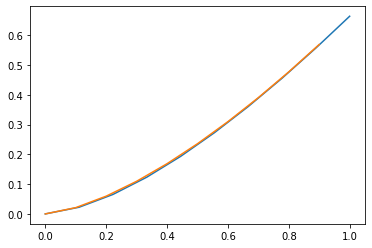

In [37]:
x = np.linspace(0,1,10)
y = [i*compute_neural_network(i,*final_weights) for i in x]
plt.plot(x,y)

x_a = [n*0.1 for n in range(0,10)]
y_a = [2/3*i**(3/2) for i in x_a]
plt.plot(x_a,y_a)

plt.show()

I tested it and the results are consistent: i.e., if I use different weights and find the Error, the output
function is always the same. 
The problem is that the results are not the same as in the paper


The analytical solution is $$2/3x^{3/2}$$

In [26]:
y_a, y

([0.0,
  0.021081851067789197,
  0.0596284793999944,
  0.10954451150103324,
  0.16865480854231357,
  0.23570226039551584,
  0.3098386676965934,
  0.39044134571590194,
  0.4770278351999552,
  0.5692099788303082],
 [0.0,
  0.022487623598253906,
  0.06536019797543997,
  0.1233229649953681,
  0.19312626661655366,
  0.27268605216288194,
  0.3605571080270501,
  0.4556367623166721,
  0.5570074850854737,
  0.6638584929667706])